In [24]:
#######################
# Interpolates some f #
#######################
import radiant as rad
import numpy as np


# Problem Parameters
a = 0
b = 1


def f(x):
    return np.cos((2 * np.pi * x / (b - a)) ** 2) * 2 * np.pi * x / (b - a)

In [25]:
# Parameters
d = 1
k = 1
ncentres = 1000
delta = 0.002

# Computed Parameters
phi = rad.phi_factory(d, k)
centres = np.linspace(a, b, ncentres)
error_integrator = rad.integrate.LeggaussIntegrator(a, b, 500)

# Solve for approximate solution
approx, _ = rad.interpolate.solve(f, centres, delta, phi)
error = rad.error(f, approx, error_integrator)

print("L2 Relative Error:", error)

L2 Relative Error: 0.5999536199517863


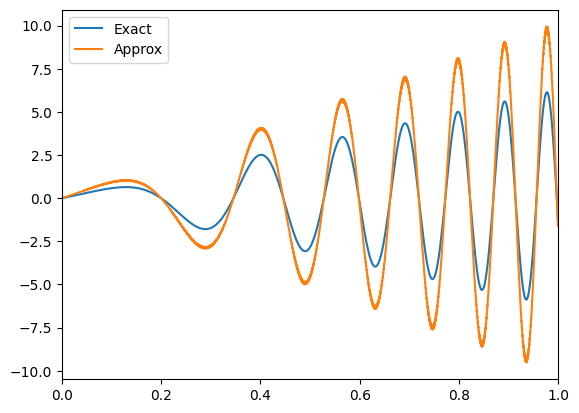

In [26]:
rad.plot.many(a, b, f, approx, n=5000, labels=["Exact", "Approx"])